# Monte Carlo simulations for TEP2485

### imports 

In [123]:
import scipy.stats as sts #distributions
import numpy as np 
import matplotlib.pyplot as plt #plotting
import random #for bootstrapping

from tqdm.notebook import tqdm #progress bar


#### MC for pi
###### Image to visualize the concept

![Darts](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

### pick distributions and generate samples

In [138]:
#sample some points in first quadrant from 0-1 for both x and y
n_samples = 1000
X = sts.uniform.rvs(0,1, n_samples)
Y = sts.uniform.rvs(0,1, n_samples)

### check for all points if they are withing the circle 

In [139]:
counter = 0
xy_status = []
x_in = []
y_in = []
x_out = []
y_out = []
for x, y in tqdm(zip(X, Y)):
    if x**2 + y**2 <1:
        counter +=1
        xy_status.append(1)
        x_in.append(x)
        y_in.append(y)
    else:
        xy_status.append(0)
        x_out.append(x)
        y_out.append(y)

0it [00:00, ?it/s]

### visualize the results point by point

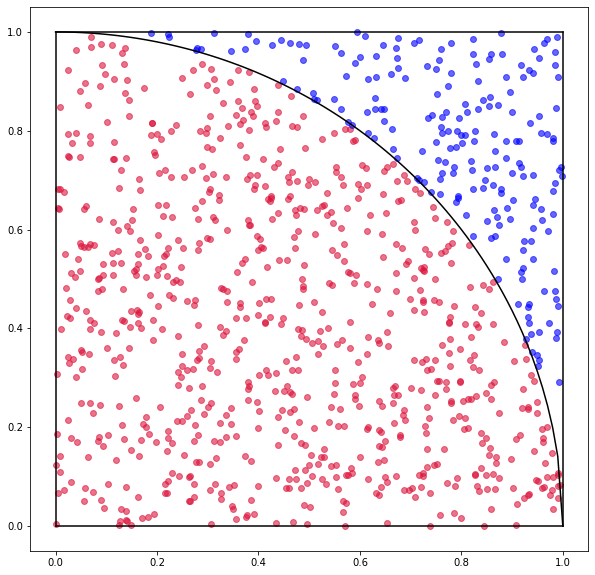

In [140]:
plt.figure(figsize=(10,10))
plt.scatter(x_in, y_in, s = 35,c = 'crimson', alpha = 0.6)
plt.scatter(x_out, y_out, s = 35, c = 'blue', alpha = 0.6)
plt.plot([0,1],[0,0], c = 'k')
plt.plot([0,1], [1,1], c='k')
plt.plot([0,0], [0,1], c= 'k')
plt.plot([1,1], [0,1], c = 'k')
X = np.linspace(0,1, 101)
Y = [(1-x**2)**0.5 for x in X]
plt.plot(X,Y, c = 'k')

### get estimate of pi

In [141]:
print(f'out of a total of {n_samples} points {counter} were in the cirle. => Pi estimate is {counter/n_samples*4} (true pi is {np.pi}).')


out of a total of 1000 points 793 were in the cirle. => Pi estimate is 3.172 (true pi is 3.141592653589793).


### use bootstrapping for confidence intervals on the results

  0%|          | 0/500 [00:00<?, ?it/s]

This MC suggests that pi is 3.17088 plusminus 0.48522183627697546 (99% conf interval: 2.6856581637230246 - 3.6561018362769753).


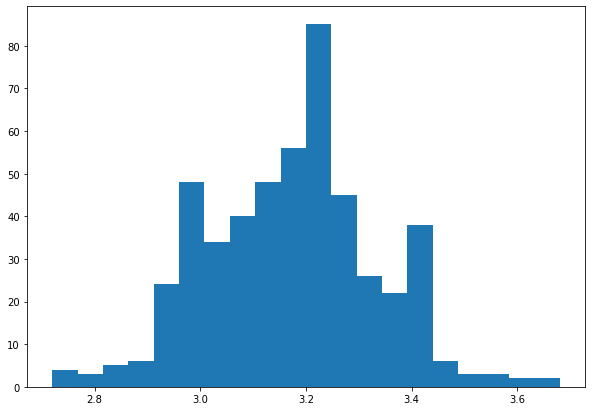

In [142]:
pi_estimates = []
BS_size = int(n_samples/10)
n_BS = 500
for _ in tqdm(range(n_BS)):
    this_list = random.sample(xy_status,BS_size)
    hits = sum(this_list)
    pi_estimates.append(hits/BS_size*4)

plt.figure(figsize=(10,7))
plt.hist(pi_estimates, bins = 'auto')
pi_mean = np.mean(pi_estimates)
pi_std = np.std(pi_estimates)
print(f'This MC suggests that pi is {pi_mean} plusminus {3*pi_std} (99% conf interval: {pi_mean - 3*pi_std} - {pi_mean + 3*pi_std}).')


###### all in one:

# generate example system and do MC for mass balanced flow

#### generate one in and one outflow:

In [65]:
n = 100000
A01 = sts.norm.rvs(100,10,n)
A10a = sts.truncnorm.rvs(a = (0-60)/20,b= 1000,loc=60, scale=5,size=n)

### plot distributions:

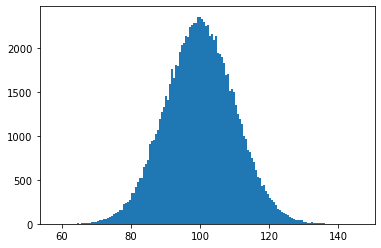

In [145]:
n, bins, patches = plt.hist(A01, bins = 'auto')

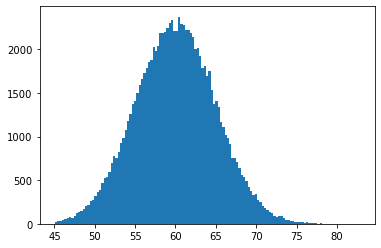

In [146]:
n, bins, patches = plt.hist(A10a, bins = 'auto')

#### MC for the resulting flow and plot

0it [00:00, ?it/s]

A01 is 110.0, A10a is 56.0 and therefore A10b is 54.0.
A01 is 95.0, A10a is 57.0 and therefore A10b is 38.0.
A01 is 88.0, A10a is 62.0 and therefore A10b is 26.0.
A01 is 98.0, A10a is 58.0 and therefore A10b is 40.0.
A01 is 92.0, A10a is 59.0 and therefore A10b is 33.0.
A01 is 94.0, A10a is 63.0 and therefore A10b is 31.0.
A01 is 108.0, A10a is 53.0 and therefore A10b is 55.0.
A01 is 107.0, A10a is 55.0 and therefore A10b is 52.0.
A01 is 96.0, A10a is 53.0 and therefore A10b is 43.0.
A01 is 96.0, A10a is 62.0 and therefore A10b is 34.0.
A01 is 108.0, A10a is 70.0 and therefore A10b is 38.0.
A01 is 76.0, A10a is 67.0 and therefore A10b is 9.0.
A01 is 84.0, A10a is 64.0 and therefore A10b is 20.0.
A01 is 95.0, A10a is 57.0 and therefore A10b is 38.0.
A01 is 97.0, A10a is 64.0 and therefore A10b is 33.0.
A01 is 101.0, A10a is 60.0 and therefore A10b is 41.0.
A01 is 78.0, A10a is 54.0 and therefore A10b is 24.0.
A01 is 121.0, A10a is 66.0 and therefore A10b is 55.0.
A01 is 102.0, A10a is 6

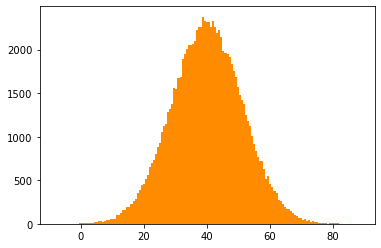

In [147]:


A10b = []

for i, (a01, a10a) in tqdm(enumerate(zip(A01,A10a))):
    if i<20:
        print(f'A01 is {np.round(a01)}, A10a is {np.round(a10a)} and therefore A10b is {np.round(a01)-np.round(a10a)}.')
    A10b.append(a01-a10a)

plt.figure()
n, bins, patches = plt.hist(A10b, color = 'darkorange', bins = 'auto')


#### plot first seven entries of result vector (for animations on slide)

(0.0, 90.0)

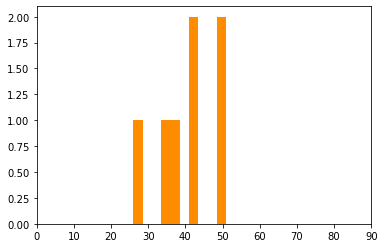

In [64]:
n, bins, patches = plt.hist(np.round(A10b[0:7]), color = 'darkorange')
plt.xlim(0,90)

## Distribution examples
just plotting the pdf of some distributions


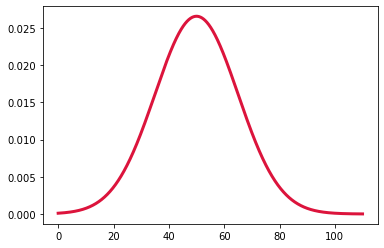

In [111]:
x = np.linspace(0,110, 10001)
plt.plot(x,sts.norm.pdf(x,loc = 50, scale=15), color = 'crimson', lw = 3)

In [ ]:
plt.plot(x,sts.truncnorm.pdf(x,a = (0-50)/15,b= (100-70)/15,loc=70, scale=15), color = 'crimson', lw = 3)

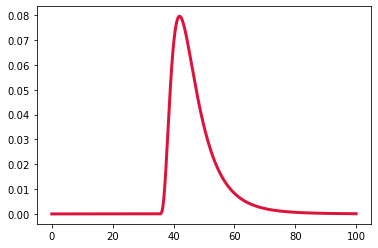

In [91]:
plt.plot(x,sts.lognorm.pdf(x, 0.6, loc=35, scale=10), color = 'crimson', lw = 3)

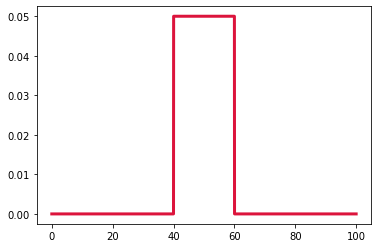

In [92]:
plt.plot(x,sts.uniform.pdf(x, 40, 20), color = 'crimson', lw = 3)

### sampling example (scatter plot)

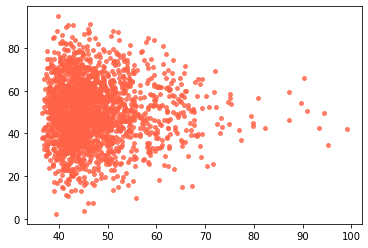

In [122]:
plt.scatter(sts.lognorm.rvs( 0.6, loc=35, scale=10, size = 2000),sts.norm.rvs(loc = 50, scale=15, size = 2000), s = 15, color = 'tomato', alpha = 0.8)